## ISYE 6740 - Assignment 1 - Regression

#### As we explore exciting new developments in AI, I want to provide some guidance around using chatbots like ChatGPT for our class assignments. 

#### The assignments are intended to develop your own skills and understanding. I encourage you to use ChatGPT liberally as a learning tool - discussing prompts and solutions with it can provide valuable insight into the problems. While ChatGPT can assist, make sure you are deeply engaged in working through the problems yourself. Take time to carefully review any suggestions from ChatGPT before submitting, and feel free to email me any prompts you find helpful. 

#### While directly copying ChatGPT solutions into assignments is not prohibited, I advise using discretion and care when relying on its outputs. The goal is to leverage this technology to enhance your learning, but not replace the thinking required, as I believe you do not want to regret being unable to answer machine learning questions well in a job interview.

### Please leave the name of your teammate here if applicable.

In [2]:
### Wenxin Jiang
### Yihan Liao
### Yu Zheng

### 1. OLS Linear Regression

* In this question, we use a dataset of concrete to study OLS linear regression. For both training and testing data, the first 8 columns are features of concrete and the last column is "Concrete compressive strenth". We will train a linear regression model to predict the target variable of "Concrete compressive strenth".
* Please refer to the following package for OLS linear regression:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* For this regression problem, we use Mean Square Error (MSE) as the metric to evaluate the performance of trained models. Given $n$ samples, let $\{Y_i\}_{i=1}^n$ be the observed values of the variable being predicted and $\{\hat{Y}_i\}_{i=1}^n$ be the predicted values. Then the MSE of the predictor is computed as 
<center>$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (Y_i-\hat{Y}_i)^2$.

#### a) Traing a linear regression model using the training set and report the training MSE.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [9]:
### Insert Code Here
training_data = pd.read_excel('Q1_train.xls')
X_train = np.array(training_data.iloc[:, :-1])
y_train = np.array(training_data.iloc[:, -1])

model = LinearRegression()
model.fit(X_train, y_train) 

y_train_predict = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_predict)

coefficient = model.coef_
intercept = model.intercept_
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Training MSE: {mse}')

Coefficient: [ 0.11474118  0.09854176  0.08039343 -0.1961972   0.21584407  0.00677105
  0.01266422  0.10922624]
Intercept: 5.111198817050507
Training MSE: 101.06509371850495


In [3]:
training_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,281.252225,71.286687,55.777162,181.864225,6.184523,973.600338,773.520788,46.566250,36.019474
std,106.272045,85.442583,64.648521,21.311460,6.021149,78.658074,81.982746,63.491946,16.538200
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,164.900000,0.000000,932.000000,733.750000,14.000000,24.060644
50%,266.000000,20.000000,0.000000,185.000000,6.215000,968.000000,780.045000,28.000000,34.704774
75%,359.000000,139.250000,118.310000,193.000000,10.025000,1032.750000,825.000000,56.000000,46.229366
max,540.000000,359.400000,200.100000,247.000000,32.200000,1134.300000,992.600000,365.000000,82.599225


#### b) Evalaute the learnt model using the testing set. Please report the testing MSE.

In [10]:
### Insert Code Here
test_data = pd.read_excel('Q1_test.xls')
X_test = np.array(test_data.iloc[:, :-1])
y_test = np.array(test_data.iloc[:, -1])

y_predict = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_predict)
print(f'MSE: {mse_test}')

MSE: 130.57162483135338


#### c) Which of the MSEs on the training and testing sets is larger? Why?

In [7]:
### Your Answer Here
'''The MSE on the testing set is larger. The difference is typical in machine learning because models generally perform better on the training data 
they were optimized for. The testing data is unseen, so the model's ability to generalize is often lower, leading to a higher MSE.
'''

"The MSE on the testing set is larger. The difference is typical in machine learning because models generally perform better on the training data \nthey were optimized for. The testing data is unseen, so the model's ability to generalize is often lower, leading to a higher MSE.\n"

#### d) If we have infintely many training data points, can we make MSE (on the testing set) of our model as small as possible? Why?

In [8]:
### Your Answer Here
'''With infinitely many training data points, the model could capture the true relationship between features and the target more accurately, 
potentially reducing the testing MSE. However, the testing MSE can never be zero due to inherent noise in the data and the limitations of a 
linear model in capturing non-linear patterns.'''

'With infinitely many training data points, the model could capture the true relationship between features and the target more accurately, \npotentially reducing the testing MSE. However, the testing MSE can never be zero due to inherent noise in the data and the limitations of a \nlinear model in capturing non-linear patterns.'

#### e) Use gradient descent to train a linear regression model. Recall that the objective function is 
<center>$\hat{w}=\mathop{\arg\min}_{w}\frac{1}{n} \sum_{i=1}^n (Y_i-X_i^\top w)^2$</center>
    
Here, set max_iteration = 1e5, stepsize = 3e-7, and stopping criterion = 1e-5. Please compute the gradient of the parameters and then follow the algorithm outline to finish your codes. 

#### Please plot the optimization error $\text{Opt. Err.} = \|\hat{w}-w^{(k)}\|_2^2$ vs iteration, where $\hat{w}$ is the coefficient vector (including intercept) learnt in a) and $w^{(k)}$ is the coefficient vector at the $k$-th iteration of gradient descent.

6089307.351335321
26407.61090143053
13517.01438028137
13461.65729867218
13406.920949084913
13352.5399157289
13298.51148984487
13244.832987505679
13191.50174580058
13138.51512267068
13085.870496745936
13033.565267183521
12981.596853507284
12929.962695448632
12878.660252788533
12827.687005200984
12777.040452097433
12726.718112472685
12676.717524751899
12627.0362466388
12577.671854965163
12528.62194554135
12479.884133008163
12431.456050689812
12383.335350448053
12335.519702537445
12288.006795461748
12240.794335831537
12193.88004822284
12147.261675036849
12100.93697636097
12054.90372983067
12009.159730492662
11963.702790668853
11918.530739821806
11873.641424420834
11829.032707809361
11784.7024700733
11740.648607910487
11696.869034500989
11653.361679378624
11610.124488303436
11567.155423134951
11524.45246170689
11482.013597702275
11439.836840530077
11397.920215202392
11356.261762212856
11314.859537415838
11273.711611906741
11232.816071903
11192.171018626297
11151.774568185472
11111.62485146

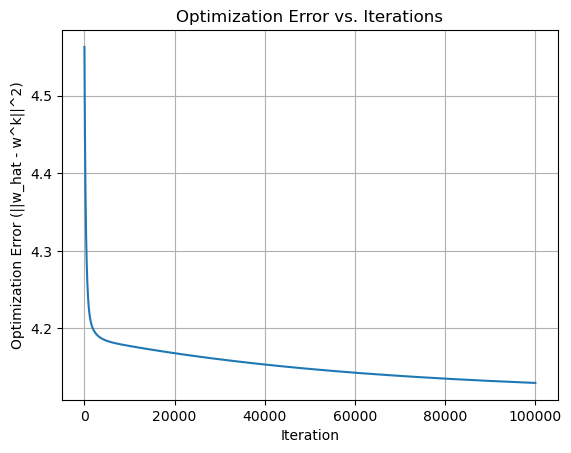

In [11]:
### Insert Code Here


#initialize parameter vetor w.
#loop t=1:max_iter:
#    update w using gradient (Hint: compute X'X and X'Y).
#    Compute the testing MSE of parameter w.
#    Stop the iteration if the 2-norm of gradient is smaller than 1e-5.

X_train_augmented = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test_augmented = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

def gradient_descent(X_train_augmented, X_test_augmented, y_train, y_test, max_iter = 1e5, tolerance = 1e-5, stepsize = 3e-7):
    n, d = X_train_augmented.shape
    testing_MSE = []
    opt_error = []
    w = np.ones(d)
    
    XTX = X_train_augmented.T @ X_train_augmented
    XTY = X_train_augmented.T @ y_train
    for iter in range(int(max_iter)):
        gradient = (2/n) * (XTX @ w - XTY)
        w -= stepsize * gradient
        
        y_predict = X_test_augmented @ w
        testing_MSE.append(mean_squared_error(y_test, y_predict))
        
        w_hat = np.concatenate((coefficient, [intercept]))
        opt_error.append(np.linalg.norm(w - w_hat, ord = 2))
        
        if np.linalg.norm(gradient, ord = 2) < tolerance:
            return w, testing_MSE, opt_error
    return w, testing_MSE, opt_error

w, testing_MSE, opt_error = gradient_descent(X_train_augmented, X_test_augmented, y_train, y_test)

plt.plot(opt_error)
plt.xlabel('Iteration')
plt.ylabel('Optimization Error (||w_hat - w^k||^2)')
plt.title('Optimization Error vs. Iterations')
plt.grid(True)
plt.show()

#### f) Please plot the testing MSE vs iteration.

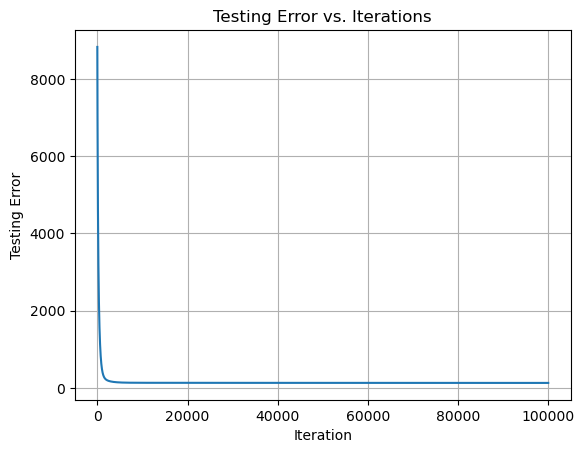

In [13]:
### Insert Code Here
plt.plot(testing_MSE)
plt.xlabel('Iteration')
plt.ylabel('Testing Error')
plt.title('Testing Error vs. Iterations')
plt.grid(True)
plt.show()

#### g) Given what you have observed in e) and f), what can you say about the number of iterations we need from a prediction perspective? Why?

In [11]:
### Insert Code Here
'''The optimization error and the testing error are decreasing sharply at first and then stablize. This indicates the number of iterations should be about 10000.
After 20000 iterations, the testing error hardly changes and the optimization error changes a little, which means the training will not provide substantial benefits
for the predtion.
'''

'The optimization error and the testing error are decreasing sharply at first and then stablize. This indicates the number of iterations should be about 10000.\nAfter 20000 iterations, the testing error hardly changes and the optimization error changes a little, which means the training will not provide substantial benefits\nfor the predtion.\n'

### 2. Robust Regression

* Please find the Concrete dataset for Q2.
* This dataset is very similiar that of Q1, but the training set is contaminated.
* Please refer to the following package for quantile regression:
https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html
* Note that the quantile regression is identical to LAD regression when using 50% quantile. 

#### a) Train a linear regression model on the training dataset using OLS, and report the testing MSE.

In [3]:
### Insert Code Here
training_data = np.array(pd.read_excel('Q2_train.xls'))
test_data = np.array(pd.read_excel('Q2_test.xls'))

X_train = training_data[:, :-1]
y_train = training_data[:, -1]

X_test = test_data[:, :-1]
y_test = test_data[:, -1]

model = LinearRegression()
model.fit(X_train, y_train)

coefficient = model.coef_
intercept = model.intercept_

y_predict = model.predict(X_test)
testing_MSE = mean_squared_error(y_test, y_predict)


print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Testing MSE: {testing_MSE}')

Coefficient: [ 0.09503743  0.06411704  0.07303498 -0.37748892 -0.11020758 -0.02246484
 -0.02414981  0.12266659]
Intercept: 109.81895616078504
Testing MSE: 173.65733448483672


#### b) Train a linear regression model on the training dataset using LAD (set regularization constant alpha =1), and report the testing MSE.

In [5]:
### Insert Code Here
from sklearn.linear_model import QuantileRegressor
#Train

quantile = 0.5
qr = QuantileRegressor(quantile=quantile, fit_intercept=True, alpha = 1)
qr.fit(X_train, y_train)

coef = qr.coef_
intercept = qr.intercept_

# Test
y_predict = qr.predict(X_test)

testing_MSE = mean_squared_error(y_test, y_predict)

print(f'Coefficient: {qr.coef_}')
print(f'Intercept: {qr.intercept_}')
print(f'Testing MSE: {testing_MSE}')


Coefficient: [ 1.17608175e-01  9.38521644e-02  8.71934067e-02 -1.97939677e-01
  1.50096273e-14 -4.53484018e-14  7.25308312e-03  1.43015189e-01]
Intercept: 17.133524065869846
Testing MSE: 137.7399386837802


In [6]:
### Insert Code Here
import statsmodels.api as sm
#Train
X_train = sm.add_constant(X_train)

model = sm.QuantReg(y_train, X_train)
result = model.fit(q=0.5)  

print(result.summary())

# Test
X_test = sm.add_constant(X_test)

y_predict = result.predict(X_test)

testing_MSE = mean_squared_error(y_test, y_predict)

print(f'Testing MSE: {testing_MSE}')


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3113
Model:                       QuantReg   Bandwidth:                       5.127
Method:                 Least Squares   Sparsity:                        23.84
Date:                Fri, 20 Sep 2024   No. Observations:                  800
Time:                        15:54:03   Df Residuals:                      791
                                        Df Model:                            8
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1664     35.459      0.484      0.628     -52.438      86.771
x1             0.1262      0.011     11.463      0.000       0.105       0.148
x2             0.1114      0.013      8.312      0.000       0.085       0.138
x3             0.0974      0.016      6.030      0.0

#### c) Does LAD outperform OLS? Why?

In [14]:
### Your Answer Here
'''LAD outperforms OLS. Reasons are as follows:
LAD minimizes the sum of absolute values of residuals, which means the outliers have a more limited impact on the model.
LAD makes no assumption on the residual, which means it more robust to non-normal error distributions and does not 
amplify the errors when variance of error is high.'''

'LAD outperforms OLS. Reasons are as follows:\nLAD minimizes the sum of absolute values of residuals, which means the outliers have a more limited impact on the model.\nLAD makes no assumption on the residual, which means it more robust to non-normal error distributions and does not \namplify the errors when variance of error is high.'

### 3. Linear Classification

* In this question, we use a dataset about spam emails to study linear classifiers. For both training and testing data, the first 57 columns are different features of emails, such as the frequency of occurence of a particular word, and the last column shows whether an email is spam (1 for spam). We will train linear classifiers to predict if a given email is spam.
* Please refer to the following package for different linear classifiers.\

Linear Discriminant Analysis Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

Gaussian Naive Bayes Classifier:
https://scikit-learn.org/stable/modules/naive_bayes.html

Logistic Regression Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* For this classification problem, we use classification error as the metric to evaluate the performance of trained models. Given $n$ samples, let $\{Y_i\}_{i=1}^n$ be the observed labels of the variable being predicted and $\{\hat{Y}_i\}_{i=1}^n$ be the predicted labels. Then the classification error of the predictor is computed as
<center>$\text{Classification Error} = \frac{1}{n} \sum_{i=1}^n \mathbb{1}(Y_i \neq \hat{Y}_i).$


#### a) Train a Linear Discriminant Analysis Classifier using the training set and report the classification error on the testing set.

In [15]:
### Insert Code Here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

training_data = pd.read_csv('Q3_train.csv')
testing_data = pd.read_csv('Q3_test.csv')

# Separate features and target variable for training and testing data
X_train = training_data.iloc[:, :-1] 
y_train = training_data.iloc[:, -1]   

X_test = testing_data.iloc[:, :-1]
y_test = testing_data.iloc[:, -1]

lda_classifier = LinearDiscriminantAnalysis()

# Train the LDA classifier 
lda_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lda_classifier.predict(X_test)

# Calculate classification error
classification_error = 1 - accuracy_score(y_test, y_pred)
print(f'Classification error of LDA: {classification_error}')


Classification error of LDA: 0.09940249864204231


#### b) Repeat the above using Gaussian Naive Bayes Classifier.

In [16]:
### Insert Code Here
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()

# Train the Gaussian Naive Bayes classifier
gnb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gnb = gnb_classifier.predict(X_test)

# Calculate classification error
classification_error_gnb = 1 - accuracy_score(y_test, y_pred_gnb)
print(f'Classification error of Gaussian Naive Bayes Classifier: {classification_error_gnb}')


Classification error of Gaussian Naive Bayes Classifier: 0.19174361759913094


#### c) Repeat the above using Logistic Regression Classifier.

In [17]:
### Insert Code Here
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression()

# Train the Logistic Regression classifier
logreg_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_logreg = logreg_classifier.predict(X_test)

# Calculate classification error
classification_error_logreg = 1 - accuracy_score(y_test, y_pred_logreg)
print(f'Classification error of logistic regression classifier: {classification_error_logreg}')


Classification error of logistic regression classifier: 0.07713199348180333


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### d) Please compare the classification errors of Linear Discriminant Analysis and Guassian Naive Bayes Classifier, and provide an explanation for the results.

In [18]:
### Your Answer Here
'''LDA has a lower classification error than the Guassian Naive Bayes Classifier. 
Explanation: LDA assumes the data for each class follows a Guassian distribution with the same covariance matrix but 
different means, which makes LDA more flexible in modeling the relationships between features. However, guassian 
Navie Bayes Classifier makes strong assumption that features are conditionally independent given the class label,
which is rarely true in real-world. The assumption of guassian naive bayes classfier might be violated, so the 
LDA out performs gaussian naive bayes classifier.'''

'LDA has a lower classification error than the Guassian Naive Bayes Classifier. \nExplanation: LDA assumes the data for each class follows a Guassian distribution with the same covariance matrix but \ndifferent means, which makes LDA more flexible in modeling the relationships between features. However, guassian \nNavie Bayes Classifier makes strong assumption that features are conditionally independent given the class label,\nwhich is rarely true in real-world. The assumption of guassian naive bayes classfier might be violated, so the \nLDA out performs gaussian naive bayes classifier.'

#### e) Please compare the classification errors of Linear Discriminant Analysis and Logistic Regression, and provide an explanation for the results.

In [19]:
### Your Answer Here
'''Logistic Regression has a lower classification error than the LDA.
Explanation: Logistic Regression makes no assumptions about the data distribution and is more flexible in finding 
complex decision boundaries, while LDA assumes equal covariance matrices for the classes, which may be too restrictive for
datasets.'''

'Logistic Regression has a lower classification error than the LDA.\nExplanation: Logistic Regression makes no assumptions about the data distribution and is more flexible in finding \ncomplex decision boundaries, while LDA assumes equal covariance matrices for the classes, which may be too restrictive for\ndatasets.'

### 4. K Nearest Neighbor Classifier

* In this question, we use a dataset about diabetes to study K Nearest Neighbor Classifier. For both training and testing data, the first 8 columns are different diagnostic measurements of patients, such as Blppd Pressure and BMI, and the last column shows whether a patient has diabetes (1 for diabetes). We will train a K Nearest Neighbor Classifier to predict if a person has diabetes.
* Please refer to the following package for K Nearest Neighbor Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### a) Train a K Nearest Neighbor Classifier with Euclidean Distance (Try K=3,6,9,12,15) to fit provided the diabetes training set , and predict the responses of the testing set. Plot the classification error vs K.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

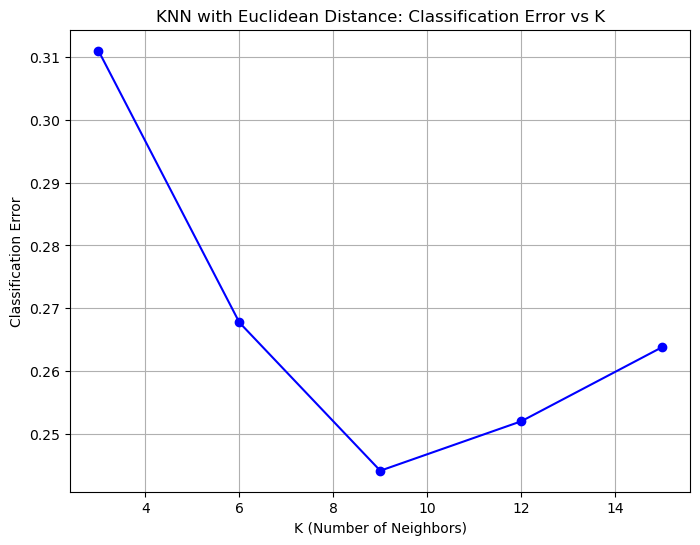

In [20]:
### Insert Code Here
from sklearn.neighbors import KNeighborsClassifier
training_data = pd.read_csv('Q4_train.csv')
testing_data = pd.read_csv('Q4_test.csv')


X_train = training_data.iloc[:, :-1]
y_train = training_data.iloc[:, -1]
X_test = testing_data.iloc[:, :-1]
y_test = testing_data.iloc[:, -1]

errors = []
list_k = [3,6,9,12,15]

for k in list_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)
    
plt.figure(figsize=(8, 6))
plt.plot(list_k, errors, marker='o', linestyle='-', color='b')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Classification Error')
plt.title('KNN with Euclidean Distance: Classification Error vs K')
plt.grid(True)
plt.show()

#### b) Repeat the above using a K Nearest Neighbor Classifier with Manhattan Distance ($L_1$-distance).

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

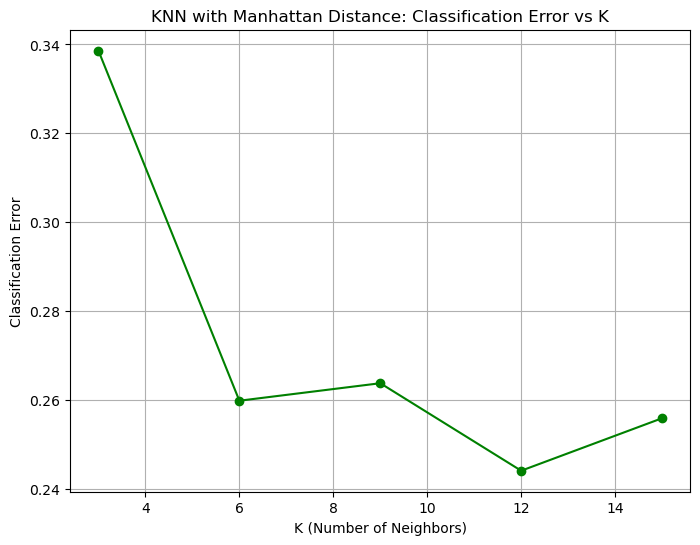

In [21]:
### Insert Code Here
manhattan_errors = []

for k in list_k:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_pred)
    manhattan_errors.append(error)

plt.figure(figsize=(8, 6))
plt.plot(list_k, manhattan_errors, marker='o', linestyle='-', color='g')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Classification Error')
plt.title('KNN with Manhattan Distance: Classification Error vs K')
plt.grid(True)
plt.show()


#### c) Repeat the above using a Logistic Regression Classifier, and compare its testing error with those of the K Nearest Neighbor Classifiers. Do you observe any difference? Why?

In [22]:
### Insert Code Here

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

logreg_error = 1 - accuracy_score(y_test, y_pred_logreg)

print(f'Logistic Regression error: {logreg_error}')
print(f'KNN errors (Euclidean distance): {errors}')
print(f'KNN errors (Manhattan distance): {manhattan_errors}')


Logistic Regression error: 0.22047244094488194
KNN errors (Euclidean distance): [0.3110236220472441, 0.26771653543307083, 0.2440944881889764, 0.25196850393700787, 0.2637795275590551]
KNN errors (Manhattan distance): [0.3385826771653543, 0.25984251968503935, 0.2637795275590551, 0.2440944881889764, 0.2559055118110236]


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
'''Observation: The error of logistic regression is lower than the error of KNN with both Euclidean and 
Manhattan distances and the classification error tends to decrease as K increases in KNN.

Explanation: 1. Logistic Regression find a strong linear relationship between the features and the outcome, which
allowed it to generalize better across the dataset.
2. KNN is sensitive to noise and K. 
3. Compared to KNN, Logistic Regression's global approach avoids the pitfalls of local noise and variation, leading to
more stable performance.'''

"Observation: The error of logistic regression is lower than the error of KNN with both Euclidean and \nManhattan distances and the classification error tends to decrease as K increases in KNN.\n\nExplanation: 1. Logistic Regression find a strong linear relationship between the features and the outcome, which\nallowed it to generalize better across the dataset.\n2. KNN is sensitive to noise and K. \n3. Compared to KNN, Logistic Regression's global approach avoids the pitfalls of local noise and variation, leading to\nmore stable performance."